# ABALONE CASE STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data
df=pd.DataFrame(data=data)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
# adding 1.5 to all the value rings

df['Age']=df['Rings']+1.5

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [7]:
df.drop('Rings',axis=1,inplace=True)

In [8]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [9]:
# encoding the string values to numeric 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df['Sex']=le.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [11]:
df.isnull().sum()   # NO NULL VALUES ARE PRESENT

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [12]:
df.describe()
#data is  skewed in whole weight ,shuked weight 
# few  outliers will be present 
# high std in whole weight ,shucked weight 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [13]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

In [14]:
df['Diameter']=np.sqrt(df['Diameter'])
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.996014
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

In [15]:
# removing skewness from height 

df['Height']=np.sqrt(df['Height'])
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.996014
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

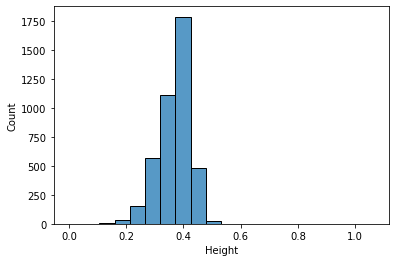

In [16]:
sns.histplot(df['Height'],bins=20)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), int32(1)
memory usage: 277.5 KB


In [18]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.036066,-0.038795,-0.040410,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.983864,0.883322,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038795,0.983864,1.000000,0.891417,0.896353,0.864374,0.871745,0.878854,0.578149
Height,-0.040410,0.883322,0.891417,1.000000,0.843708,0.797910,0.822861,0.841225,0.592653
Whole weight,-0.021391,0.925261,0.896353,0.843708,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.864374,0.797910,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.871745,0.822861,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.878854,0.841225,0.955355,0.882617,0.907656,1.000000,0.627574
Age,-0.034627,0.556720,0.578149,0.592653,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

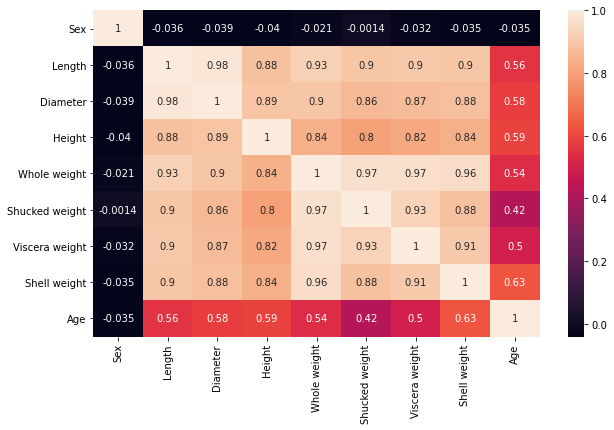

In [19]:
#checking corrilation
#length and diameter are multicolinear,shuked weight and whole weight have multicolinierity

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [20]:
df.shape

(4177, 9)

In [21]:
#checking outliers 


from scipy.stats import zscore


In [22]:
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.34781661, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.41869312, ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.1784716 , ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67128813, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.75776482, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.33967575, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [23]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  148,  149,  163,  164,  165,  165,
        165,  166,  166,  167,  168,  170,  181,  232,  236,  236,  236,
        237,  237,  237,  238,  238,  238,  239,  239,  239,  270,  275,
        277,  278,  294,  305,  306,  306,  310,  313,  314,  321,  334,
        351,  355,  358,  358,  362,  375,  416,  417,  428,  431,  433,
        465,  469,  478,  480,  501,  523,  525,  526,  526,  530,  572,
        611,  628,  673,  674,  675,  678,  694,  694,  696,  696,  718,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891,  892,  898, 1048, 1051, 1051, 1052, 1053, 1055,
       1174, 1193, 1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207,
       1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427,
       1427, 1428, 1429, 1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761,
       1762, 1762, 1762, 1763, 1763, 1763, 1821, 1824, 1982, 1986, 1986,
       1987, 1987, 1987, 2051, 2090, 2108, 2108, 2

In [24]:
z[6][8]  # checking the value at 6th row 8th column

3.12251641377204

In [25]:
# removing outliers 
df_new=df[(z<3).all(axis=1)]
df_new


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.604152,0.308221,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.514782,0.300000,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.648074,0.367423,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.604152,0.353553,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.504975,0.282843,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.670820,0.406202,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.663325,0.367423,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.689202,0.452769,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.696419,0.387298,1.0945,0.5310,0.2610,0.2960,11.5


In [26]:
#splitting x and y 

x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [27]:
x.shape

(3994, 8)

In [28]:
y.shape

(3994,)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
#applying variance inflation factor 

def vif_abalon():
    vif=pd.DataFrame()
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['feature']=x.columns
    print(vif)

In [31]:
vif_abalon()

   VIF FACTOR         feature
0    2.645719             Sex
1  597.163531          Length
2  871.886921        Diameter
3  364.896069          Height
4  442.564289    Whole weight
5  110.641170  Shucked weight
6   66.832291  Viscera weight
7   93.686950    Shell weight


In [32]:
#length and diameter has high values ,whole weight and shuked weight has high values 
# length and shuked weight will be droped as they have less corelation with the target 

In [33]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [34]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Age
0,2,0.604152,0.308221,0.5140,0.1010,0.1500,16.5
1,2,0.514782,0.300000,0.2255,0.0485,0.0700,8.5
2,0,0.648074,0.367423,0.6770,0.1415,0.2100,10.5
3,2,0.604152,0.353553,0.5160,0.1140,0.1550,11.5
4,1,0.504975,0.282843,0.2050,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...
4172,0,0.670820,0.406202,0.8870,0.2390,0.2490,12.5
4173,2,0.663325,0.367423,0.9660,0.2145,0.2605,11.5
4174,2,0.689202,0.452769,1.1760,0.2875,0.3080,10.5
4175,0,0.696419,0.387298,1.0945,0.2610,0.2960,11.5


In [35]:
x.shape

(3994, 8)

In [36]:
y.shape

(3994,)

In [37]:
# applying standard scalling 
from sklearn.preprocessing import StandardScaler

In [38]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15735647, -0.61028464, -0.38335966, ..., -0.62065702,
        -0.74066229, -0.64931237],
       [ 1.15735647, -1.54409864, -1.54405998, ..., -1.23037334,
        -1.25213213, -1.27958653],
       [-1.28066132,  0.05672535,  0.18707295, ..., -0.46456964,
        -0.34609984, -0.17660676],
       ...,
       [ 1.15735647,  0.67926802,  0.72122632, ...,  0.84753988,
         1.07627344,  0.59547909],
       [-1.28066132,  0.90160469,  0.81495657, ...,  0.8743674 ,
         0.81810295,  0.50093796],
       [ 1.15735647,  1.65754935,  1.44567748, ...,  2.89618672,
         1.9433366 ,  2.06874492]])

In [39]:
x.shape

(3994, 8)

In [40]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [42]:
x_train.shape

(3195, 8)

In [43]:
y_train.shape

(3195,)

In [44]:
x_test.shape

(799, 8)

In [45]:
y_test.shape

(799,)

In [46]:
lg=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [47]:
model=[lg,svr,dtr,rf]

for m in model:
    m.fit(x_train,y_train)
    score= m.score(x_train,y_train)
    pmodel=m.predict(x_test)
    print('the errors for ',m,'is')
    print('mean absolute error',mean_absolute_error(y_test,pmodel))
    print('mean squared error',mean_squared_error(y_test,pmodel))
    print('r2 score for',m,'is', r2_score(y_test,pmodel))
    print('/n')

the errors for  LinearRegression() is
mean absolute error 1.48270906265117
mean squared error 3.896979007337447
r2 score for LinearRegression() is 0.5238601849062043
/n
the errors for  SVR() is
mean absolute error 1.3496930641909854
mean squared error 3.6829151445349164
r2 score for SVR() is 0.5500148877827535
/n
the errors for  DecisionTreeRegressor() is
mean absolute error 1.9073842302878599
mean squared error 7.003754693366709
r2 score for DecisionTreeRegressor() is 0.14426881479652665
/n
the errors for  RandomForestRegressor() is
mean absolute error 1.3856570713391738
mean squared error 3.6282345431789733
r2 score for RandomForestRegressor() is 0.5566958607543335
/n


In [48]:
# applying the cross validation on all models to find out the best one 

from sklearn.model_selection import cross_val_score

In [49]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.37618153 0.19682544 0.48698651 0.49883282 0.468274  ]
0.4054200617827407
0.11286828872057511


In [50]:
score=cross_val_score(svr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.31016844 0.48246921 0.48136667 0.54353858 0.55645975]
0.4748005299175918
0.08786215790346528


In [51]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.00980884 -0.5554428  -0.0190062   0.01599328  0.05241009]
-0.10317089380722728
0.22748872029847864


In [52]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.40814968 0.28294845 0.48581027 0.52108993 0.50144109]
0.4398878862484931
0.08732552289947607


In [53]:
# hypertuning 
from sklearn.linear_model import Ridge

In [54]:
alphavalue={'alpha':[.01,1,0.001,0.0001,0.00001]}
model=Ridge()

In [55]:
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.01, 1, 0.001, 0.0001, 1e-05]})
0.40572813205947106
1
{'alpha': 1}


In [56]:
from sklearn.ensemble import AdaBoostRegressor
#AdaBoostClassifier(base estimator=decision tree classifier(),n_estimator=50,learning rate=1)
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
pad=ad.predict(x_test)
score=ad.score(x_train,y_train)
score

0.3816457548662311

In [ ]:
#

# REGULARIZATION

In [57]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score

In [58]:
rdg=Ridge(alpha=1,random_state=45)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.5042120599092648

In [59]:
rdg.predict(x_test)

array([11.24816039, 13.98298928, 10.37558056,  9.20221797, 11.67603461,
       10.3219842 , 10.52496617, 13.33865361, 14.22332351, 15.67258861,
       10.00368755, 11.30131394, 12.74466501, 10.89525249, 10.93935408,
       10.74891343, 12.27057245, 11.16421327, 12.05257878, 11.37993865,
        9.05345661, 11.49271613,  8.62266945, 12.44822098, 10.09328421,
        8.83668313,  9.06418989,  9.69654388,  6.31318039, 11.2482283 ,
       12.17226089, 11.88521604,  7.99016593, 11.26550851, 10.30578818,
       14.35805618,  8.89619848, 15.591185  , 10.21591236, 10.4262742 ,
       12.74332911, 18.05025091, 11.89245752, 15.4923394 , 10.41589728,
       12.60815164, 12.15479846, 14.93244953,  8.13521439, 12.81849161,
        8.04827404, 12.39684822, 12.50355546,  9.98556514,  9.08891556,
        8.87606532,  8.68261059, 13.49511108, 10.66681409, 13.5360688 ,
        9.53938527, 12.14968177, 14.24025416,  8.68653566, 12.97640813,
       17.1827628 , 11.21933077,  6.95208894, 11.63943214, 11.70

In [60]:
# USING THE MODEL TO PREDICT THE RANDOM VALUES 



input_data=(2,0.455,0.604152,0.308221,0.5140,0.2245,0.1010,0.1500)
    
#changing the input data into numpy array

input_data_np=np.asarray(input_data)

#reshape 
input_data_reshape=input_data_np.reshape(1,-1)

prediction=rf.predict(input_data_reshape)

print(prediction)

[14.32]


In [ ]:
# I HAVE USED THE RANDOM FOREST MODEL TO PREDICT THE RANDOM VALUES,ITS GIVING THE AGE TO BE 14.32

# Red Wine Quality Prediction(project 3)

In [60]:
data=('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
df.shape

(1599, 12)

In [62]:
df['quality'].value_counts()  #check the count of wine with diffrent quality 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [64]:
df.isnull().sum()  #there are no null values 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [65]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [66]:
#outliers are present 
#high std in total sulphur dioxide,free sulfur
#skewness is present in total sulphar,fixed acidity,free sulphur,residual sugar ,chlorides

In [67]:
# checking corrilation 

df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

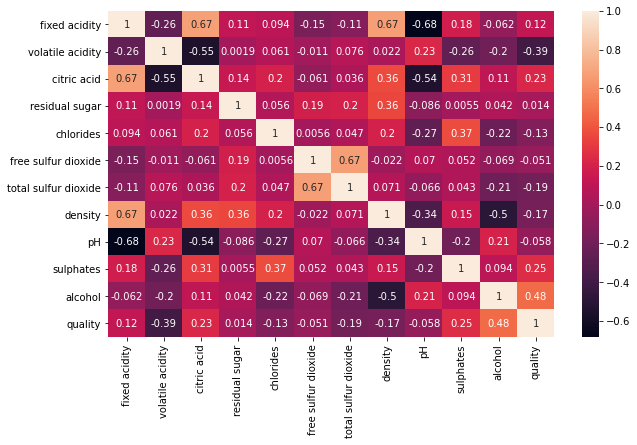

In [68]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [69]:
#corelation betwenn (volatile acidity,chlorides,total sulfur,density ) with quality is not good 
#citric acid and volatile acidity has multicolineirity

In [70]:
df.drop(['volatile acidity','chlorides','total sulfur dioxide','density'], axis = 1, inplace=True)

In [71]:
df.head(3)

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,11.0,3.51,0.56,9.4,5
1,7.8,0.00,2.6,25.0,3.20,0.68,9.8,5
2,7.8,0.04,2.3,15.0,3.26,0.65,9.8,5


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

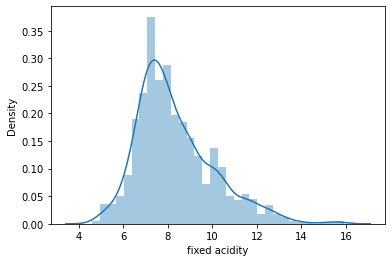

In [72]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

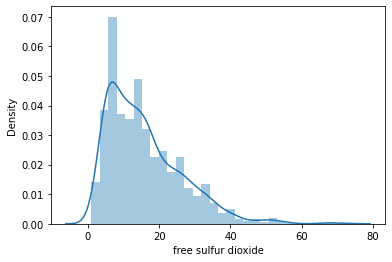

In [73]:
sns.distplot(df['free sulfur dioxide'])

In [74]:
# data is right skewed in these columns 

In [75]:
df.skew() #checking skewness 

fixed acidity          0.982751
citric acid            0.318337
residual sugar         4.540655
free sulfur dioxide    1.250567
pH                     0.193683
sulphates              2.428672
alcohol                0.860829
quality                0.217802
dtype: float64

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

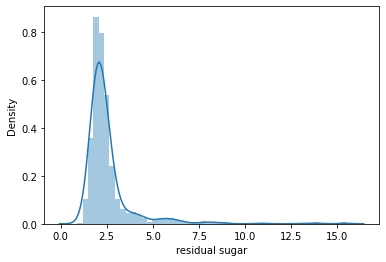

In [76]:
sns.distplot(df['residual sugar']) # right skewed 

In [77]:
#removing skewness 
df['sulphates']=np.log(df['sulphates'])
df.skew()

fixed acidity          0.982751
citric acid            0.318337
residual sugar         4.540655
free sulfur dioxide    1.250567
pH                     0.193683
sulphates              0.921867
alcohol                0.860829
quality                0.217802
dtype: float64

In [78]:
df['residual sugar']=np.log(df['residual sugar'])
df.skew()

fixed acidity          0.982751
citric acid            0.318337
residual sugar         1.806864
free sulfur dioxide    1.250567
pH                     0.193683
sulphates              0.921867
alcohol                0.860829
quality                0.217802
dtype: float64

In [79]:
# check outliers 



In [80]:
z=np.abs(zscore(df))
z

array([[0.52835961, 1.39147228, 0.5831499 , ..., 0.60206208, 0.96024611,
        0.78782264],
       [0.29854743, 1.39147228, 0.29462737, ..., 0.26665831, 0.58477711,
        0.78782264],
       [0.29854743, 1.18607043, 0.0484778 , ..., 0.06477406, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.72391627, 0.0484778 , ..., 0.70505615, 0.54162988,
        0.45084835],
       [1.39015528, 0.77526673, 0.43960453, ..., 0.45982537, 0.20930812,
        0.78782264],
       [1.33270223, 1.02199944, 1.2053288 , ..., 0.13308595, 0.54162988,
        0.45084835]])

In [81]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   17,   33,   45,   57,   81,   86,   91,   92,
         95,  106,  142,  144,  151,  151,  151,  163,  164,  169,  226,
        243,  244,  258,  274,  324,  325,  339,  347,  374,  381,  391,
        396,  396,  400,  400,  442,  459,  467,  480,  494,  517,  544,
        554,  555,  557,  584,  588,  595,  614,  639,  649,  652,  652,
        652,  690,  695,  723,  821,  832,  899,  911,  917,  923,  925,
        926,  982, 1043, 1051, 1071, 1074, 1079, 1081, 1111, 1131, 1154,
       1175, 1186, 1231, 1235, 1244, 1244, 1269, 1270, 1295, 1296, 1299,
       1300, 1316, 1319, 1321, 1358, 1374, 1434, 1434, 1435, 1435, 1469,
       1474, 1474, 1476, 1476, 1478, 1505, 1558, 1574, 1589], dtype=int64), array([5, 3, 3, 5, 2, 4, 3, 5, 5, 5, 5, 4, 5, 6, 6, 1, 4, 5, 2, 2, 5, 5,
       0, 0, 5, 2, 2, 2, 5, 0, 0, 0, 0, 2, 3, 2, 3, 0, 7, 6, 2, 2, 7, 0,
       0, 0, 0, 3, 6, 2, 5, 5, 2, 0, 2, 6, 7, 4, 5, 6, 7, 7, 2, 2, 2, 3,
       3, 3, 2, 5, 2, 2, 2, 2, 4, 3, 3, 3, 2, 3

In [82]:
z[13][5] #checking the value at 13th row and 5th column

3.9819204885091475

In [83]:
# removing outliers 
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.00,0.641854,11.0,3.51,-0.579818,9.4,5
1,7.8,0.00,0.955511,25.0,3.20,-0.385662,9.8,5
2,7.8,0.04,0.832909,15.0,3.26,-0.430783,9.8,5
3,11.2,0.56,0.641854,17.0,3.16,-0.544727,9.8,6
4,7.4,0.00,0.641854,11.0,3.51,-0.579818,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,32.0,3.45,-0.544727,10.5,5
1595,5.9,0.10,0.788457,39.0,3.52,-0.274437,11.2,6
1596,6.3,0.13,0.832909,29.0,3.42,-0.287682,11.0,6
1597,5.9,0.12,0.693147,32.0,3.57,-0.342490,10.2,5


In [84]:
df.shape

(1599, 8)

In [85]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [86]:
x.shape

(1599, 7)

In [87]:
y.shape

(1599,)

In [88]:
from imblearn.over_sampling import SMOTE


In [89]:
smote=SMOTE()
x_train,y_train=smote.fit_resample(x,y)

y_train.value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

In [90]:
# the data is balanced now 

In [91]:
# applying standard scalling 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.fit_transform(x_test)

In [92]:
#LABEL BINARIZATION 

In [93]:

#instead of 8 diffrent quality parameters we are going to divide them into good and bad 

In [130]:
Y=df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [131]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [132]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=.2,random_state=42)

In [133]:
x_train.shape

(1279, 7)

In [134]:
Y_train.shape

(1279,)

In [135]:
x_test.shape

(320, 7)

In [136]:
Y_test.shape

(320,)

# TRAINING THE MODEL

In [137]:
from sklearn.ensemble import RandomForestClassifier


In [138]:
rf=RandomForestClassifier()
rf.fit(x_train,Y_train)

RandomForestClassifier()

# MODEL EVALUATION

In [139]:
x_test_prediction=rf.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('accuracy :',test_data_accuracy)

accuracy : 0.903125


In [140]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(x_train,Y_train)
plg=lg.predict(x_test)
accuracy_score(Y_test,plg)

0.85625

In [141]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,Y_train)
pdt=dt.predict(x_test)
accuracy_score(Y_test,pdt)

0.88125

In [142]:
#BUILDING A PREDICTIVE SYSTEM

In [143]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0)
    
#changing the input data into numpy array

input_data_np=np.asarray(input_data)

#reshape 
input_data_reshape=input_data_np.reshape(1,-1)

prediction=rf.predict(input_data_reshape)

print(prediction)

[0]


In [ ]:
#IN THE LAST STEP I HAVE INPUT RANDOM VALUES FOR THE MODEL TO PREDICT AS 0 WHICH IS LOW QUALITY OR 1 WHICH IS HIGH QUALITY 
# USING THE BEST MODEL WHICH IS RANDOM FOREST ,NOW THE MODEL IS GIVING OUTPUT AS 0 ,MEANS THE RANDOM VALUES I ENTERED COMPRISES 
#OF LOW QUALITY WINE 